# 逻辑回归实验
## 回归 $\to$ 分类
将连续的数值转换成对应的区间，这样就可以完成分类任务了。  
逻辑回归中借助 sigmoid 函数完成了数值映射，通过概率值比较完成分类任务

In [1]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)

## Sigmoid

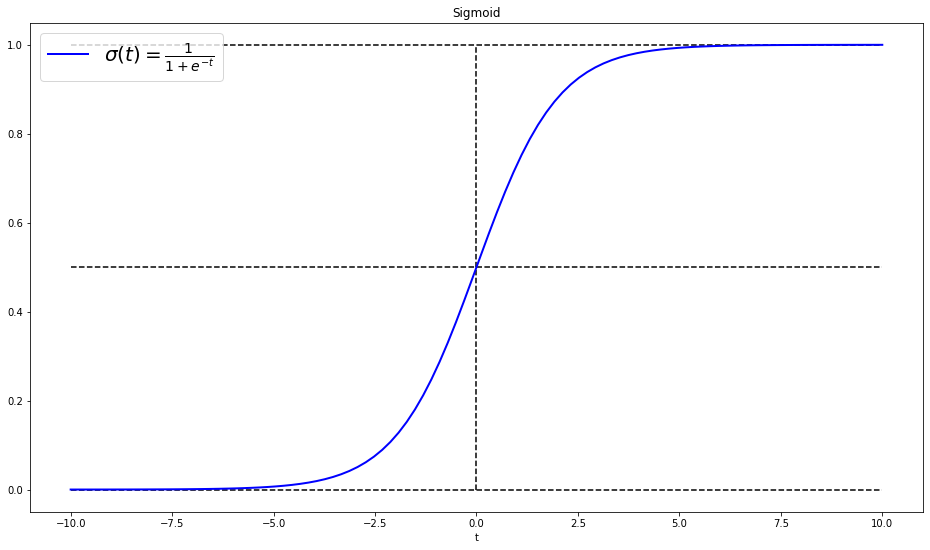

In [2]:
t = np.linspace(-10, 10, 100)
sig = 1/ (1 + np.exp(-t))
plt.figure(figsize=(16,9))
plt.plot([-10, 10], [0,0], 'k--')
plt.plot([-10, 10], [1,1], 'k--')
plt.plot([-10, 10], [0.5,0.5], 'k--')
plt.plot([0, 0], [0,1], 'k--')
plt.plot(t, sig, 'b-', linewidth=2, label=r'$\sigma(t)=\frac{1}{1+e^{-t}}$')
plt.xlabel('t')
plt.legend(loc='upper left', fontsize='20')
plt.title('Sigmoid')
plt.show()


## 逻辑回归推导公式
**类别定义**：
$$
\hat{y}=\begin{cases}0\ if\ \hat{p}< 0.5,\\1\ if\ \hat{p}\ge0.5.\end{cases}  
$$
$$
 c(\theta)=\begin{cases}-log(\hat{p})\ if\ y=1,\\-log(1-\hat{p})\ if\ y=0.\end{cases}
$$
**损失函数**：
$$
J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}\left [y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})\right]
$$
**梯度计算**：
$$
\frac{\partial}{\partial\theta_j}J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left[\sigma(\theta^T\cdot x^{(i)})-y^{(i)}\right]x_j^{(i)}
$$

## 鸢尾花数据集
- 类别：3
- 每类个数：50
- 样本总数：150
- 维度：4（4个特征）

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
print(list(iris.keys()))
print(iris.DESCR)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:   

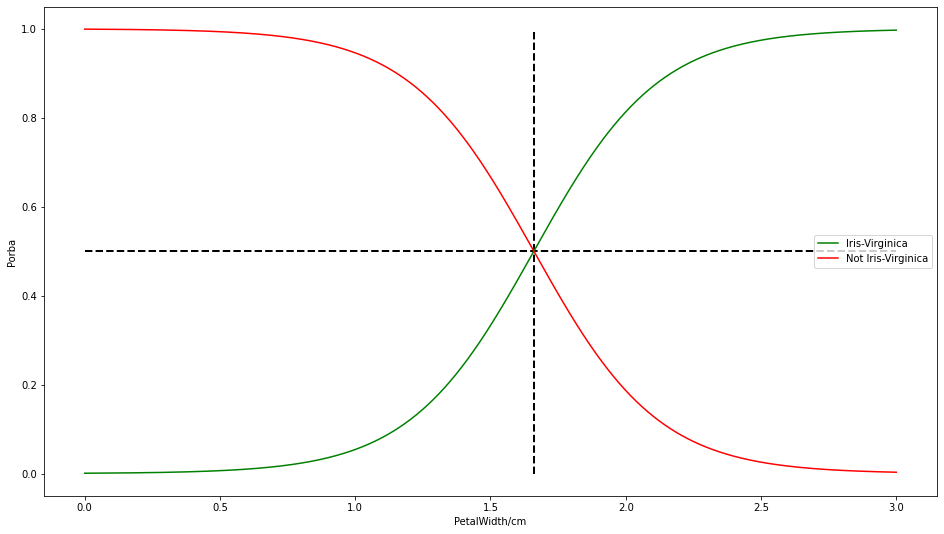

In [7]:
X = iris['data'][:,3:] # 选取其中一种特征 PetalWidthCm 1~3cm之间
y = (iris['target'] ==2).astype(np.int) # Iris-Virginica
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.figure(figsize=(16,9))
decision_boundary = X_new[y_proba[:,1]>=0.5][0]
plt.plot([decision_boundary, decision_boundary], [0, 1], 'k--', linewidth=2)
plt.plot([0,3], [0.5, 0.5], 'k--', linewidth=2)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'r-', label='Not Iris-Virginica')
plt.xlabel('PetalWidth/cm')
plt.ylabel('Porba')
plt.legend()
plt.show()


**决策边界**：

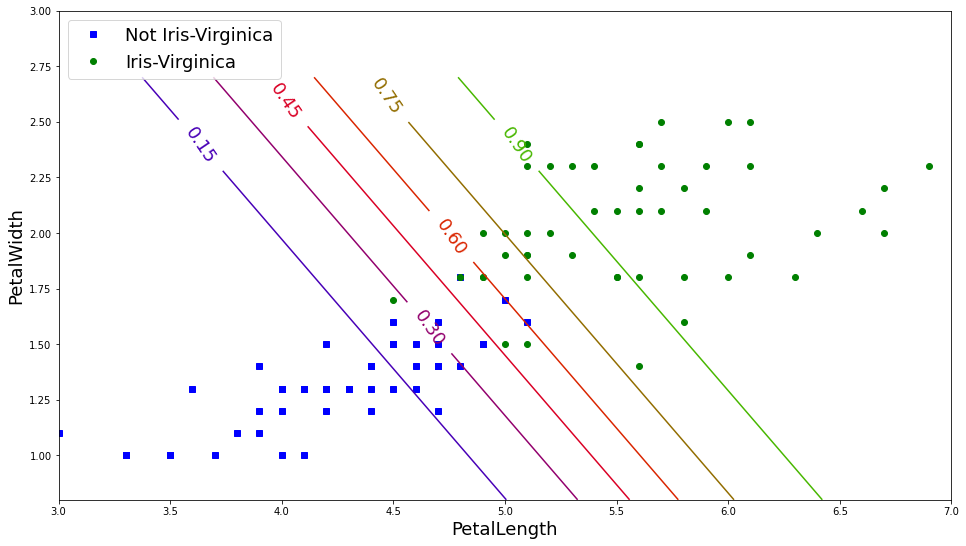

In [5]:
X = iris['data'][:, (2,3)] # 选择特征 PetalLength PetalWidth
y = (iris['target']==2).astype(np.int)
log_reg = LogisticRegression()
log_reg.fit(X, y) # 训练

# 构建坐标数据(测试)
x0, x1 = np.meshgrid(np.linspace(2,7, 500).reshape(-1,1), np.linspace(0.8,2.7,200).reshape(-1,1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
z = y_proba[:,1].reshape(x0.shape)
plt.figure(figsize=(16,9))
plt.plot(X[y==0, 0], X[y==0, 1], 'bs', label='Not Iris-Virginica')
plt.plot(X[y==1, 0], X[y==1, 1], 'go', label='Iris-Virginica')
contour = plt.contour(x0, x1, z, cmap=plt.cm.brg)
plt.clabel(contour, fontsize=18)
plt.legend(loc='upper left', fontsize=18)
plt.xlabel('PetalLength', fontsize=18)
plt.ylabel('PetalWidth', fontsize=18)
plt.axis([3,7,0.8,3])
plt.show()

## 多分类任务

<a list of 8 text.Text objects>

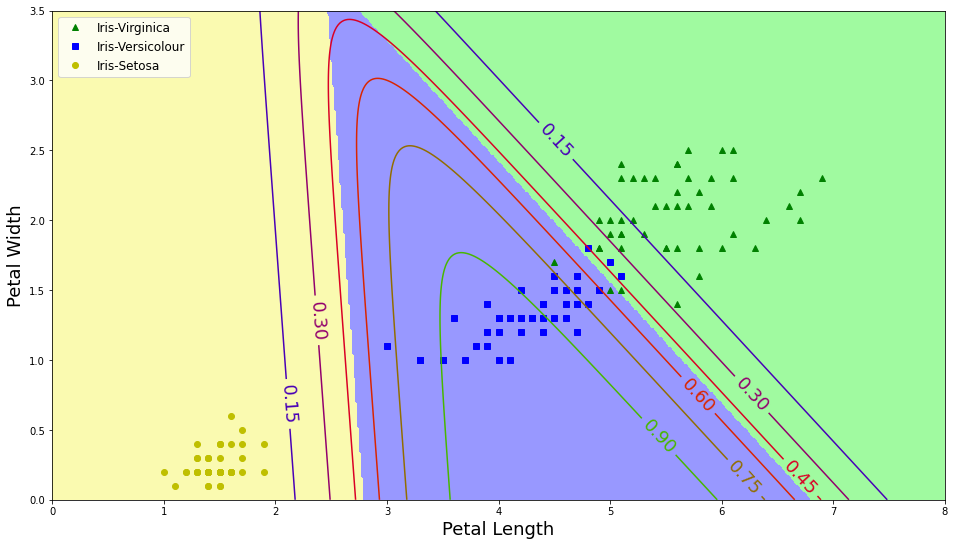

In [6]:
X = iris['data'][:,(2,3)] # PetalLength PetalWidth
y = iris['target']

#定义训练器，多分类模式，算子lbfgs
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_reg.fit(X, y)

# 测试
x0, x1 = np.meshgrid(np.linspace(0,8,500).reshape(-1,1), np.linspace(0,3.5,200).reshape(-1,1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = softmax_reg.predict_proba(X_new) # 预测概率
y_predict = softmax_reg.predict(X_new) # 预测类别
z = y_proba[:,1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(16,9))
plt.plot(X[y==2,0], X[y==2,1], 'g^', label='Iris-Virginica')
plt.plot(X[y==1,0], X[y==1,1], 'bs', label='Iris-Versicolour')
plt.plot(X[y==0,0], X[y==0,1], 'yo', label='Iris-Setosa')

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, z, cmap=plt.cm.brg)
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.legend(loc='upper left', fontsize=12)
plt.clabel(contour, fontsize=18)

## Softmax
**softmax计算概率**：
$$
\hat{p_k}=\sigma(s(X))_k=\frac{exp(s_k(X))}{\sum_{j=1}^{K}exp(s_j(X))}
$$

**将概率值放进exp函数，放大差异，再做归一化操作**

**损失函数（交叉熵）**：
$$
J(\Theta)=-\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}y_k^{(i)}log(\hat{p}_k^{(i)})
$$